In [24]:
##imported basic library to run the program 
# Imprted Pands, Numpy, Matplotlib, Seaborn, requests,json and OS
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import requests
import time
import json
from datetime import datetime
import os
from pprint import pprint

#loading the CSV file and reading 
crime_data_pd = pd.read_csv("data/crime_data.csv")


In [25]:
crime_data_pd.columns

Index(['abc', 'X', 'REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'BLOCK',
       'DISTRICT', 'PSA', 'WARD', 'ANC', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP',
       'CENSUS_TRACT', 'VOTING_PRECINCT', 'CCN', 'START_DATE', 'END_DATE',
       'XBLOCK', 'YBLOCK', 'optional', 'date', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'EW', 'NS', 'quad', 'crimetype'],
      dtype='object')

##Created Data Frame for crime_data by print first 10 rows

In [26]:
## Delete unwanted columns like Unnames anmd x
crime_data_pd.columns

Index(['abc', 'X', 'REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'BLOCK',
       'DISTRICT', 'PSA', 'WARD', 'ANC', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP',
       'CENSUS_TRACT', 'VOTING_PRECINCT', 'CCN', 'START_DATE', 'END_DATE',
       'XBLOCK', 'YBLOCK', 'optional', 'date', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'EW', 'NS', 'quad', 'crimetype'],
      dtype='object')

In [27]:
dr_col=["abc","X","REPORT_DAT","date","CENSUS_TRACT","VOTING_PRECINCT","DISTRICT","PSA","optional","EW","NS","NEIGHBORHOOD_CLUSTER","BLOCK_GROUP"]
clean_crimeData = crime_data_pd.drop(dr_col,axis=1)

In [28]:
clean_crimeData.set_index("CCN")

,SHIFT,OFFENSE,METHOD,BLOCK,WARD,ANC,START_DATE,END_DATE,XBLOCK,YBLOCK,year,month,day,hour,minute,second,quad,crimetype
CCN,,,,,,,,,,,,,,,,,,
8123749,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2,2E,8/30/2008 21:30,8/31/2008 18:40,-77.070209,38.913633,2008,8,31,20,47,0,Northwest,Non-Violent
8123824,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2,2B,8/31/2008 19:30,8/31/2008 23:30,-77.045323,38.908564,2008,9,1,0,45,0,Northwest,Non-Violent
8123835,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,2,2C,8/31/2008 23:00,9/1/2008 2:00,-77.027045,38.899057,2008,9,1,3,0,0,Northeast,Non-Violent
8127848,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2,2B,9/9/2008 7:10,9/9/2008 0:00,-77.040089,38.909638,2008,9,9,7,46,0,Northwest,Non-Violent
8120153,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,2,2C,8/5/2008 12:00,8/5/2008 13:00,-77.019377,38.894573,2008,8,24,20,0,0,Northeast,Non-Violent
8120189,EVENING,THEFT/OTHER,OTHERS,G STREET NW AND 12TH STREET NW,2,2C,8/24/2008 16:30,8/24/2008 21:24,-77.028078,38.898315,2008,8,24,21,40,0,Northeast,Non-Violent
8120280,MIDNIGHT,THEFT/OTHER,OTHERS,1000 - 1099 BLOCK OF 26TH STREET NW,2,2A,8/24/2008 23:30,8/25/2008 4:16,-77.054750,38.903264,2008,8,25,6,0,0,Northwest,Non-Violent
8123978,DAY,BURGLARY,OTHERS,1707 - 1799 BLOCK OF S STREET NW,2,2B,8/31/2008 17:30,9/1/2008 12:30,-77.040472,38.914088,2008,9,1,13,30,0,Northwest,Non-Violent
8123989,DAY,THEFT/OTHER,OTHERS,1300 - 1699 BLOCK OF CONNECTICUT AVENUE NW,2,2B,9/1/2008 13:20,9/1/2008 13:30,-77.043607,38.909927,2008,9,1,14,0,0,Northwest,Non-Violent


## Using group by function  calculated total offense  based on the shift

In [29]:
# Total number of "Crimes" were reported unique
crime_count = len(clean_crimeData['OFFENSE'].unique().tolist())
crime_count
crime_method = clean_crimeData.groupby("OFFENSE")["METHOD"].count()
crime_method.head(10)

OFFENSE
ARSON                            326
ASSAULT W/DANGEROUS WEAPON     23436
BURGLARY                       31292
HOMICIDE                        1234
MOTOR VEHICLE THEFT            33188
ROBBERY                        35267
SEX ABUSE                       2402
THEFT F/AUTO                   85287
THEFT/OTHER                   130435
Name: METHOD, dtype: int64

In [30]:
bins = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
group_names = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

In [43]:

clean_crime_bin = clean_crimeData[0:len(clean_crimeData)].copy()
clean_crime_bin['year']=clean_crime_bin.year.astype('int64')
clean_crime_bin["Year"] = pd.cut(clean_crime_bin["year"], bins, labels=group_names)
CrimeMethod_Cnt = pd.DataFrame(clean_crime_bin.groupby(["Year","METHOD"])["CCN"].count())
CrimeMethod_Cnt

# reset index and then in place = True
CrimeMethod_Cnt.reset_index(inplace=True)
CrimeMethod_Cnt

,Year,METHOD,CCN
0,2008,GUN,2350
1,2008,KNIFE,1036
2,2008,OTHERS,27824
3,2009,GUN,2015
4,2009,KNIFE,1170
5,2009,OTHERS,28412
6,2010,GUN,1877
7,2010,KNIFE,1184
8,2010,OTHERS,30513
9,2011,GUN,2212


In [45]:
CrimeMethod_Cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
Year      27 non-null category
METHOD    27 non-null object
CCN       27 non-null int64
dtypes: category(1), int64(1), object(1)
memory usage: 939.0+ bytes


In [32]:
crime_CCN = clean_crimeData.groupby("year")["CCN"].count()
crime_CCN.head(10)

year
2008    34208
2009    31210
2010    31597
2011    33574
2012    35385
2013    35919
2014    38448
2015    37316
2016    37183
2017    28027
Name: CCN, dtype: int64

### Creating a barplot using seaborn
### The only increasing value here is the Year  which is the category.
### We eleminated the "OTHERS" which has more value, canvas size 16x10

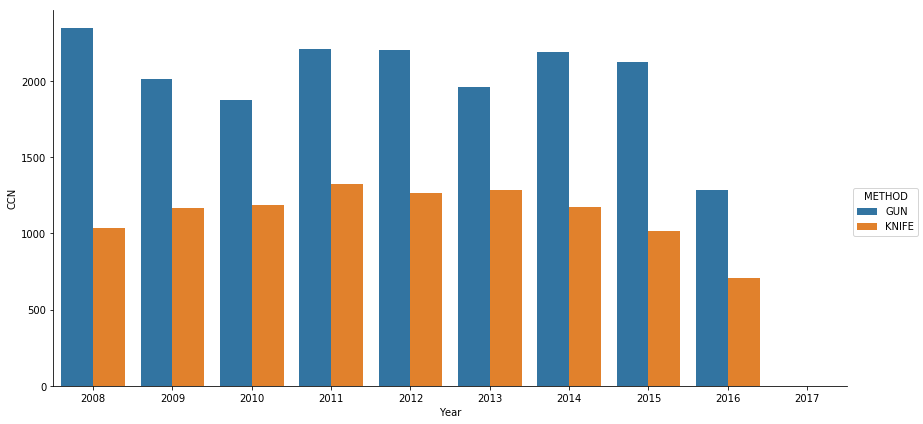

In [62]:
# Using searborn made a bar plot setting x axis is year, y is CCN and  coloring is Method by fixing the canvas size 16x10
# plt.subplots(figsize=(16, 10))
sns.factorplot(x='Year', y='CCN', hue='METHOD', data=CrimeMethod_Cnt.loc[CrimeMethod_Cnt.METHOD != 'OTHERS'], kind='bar', size=6, aspect=2)

In [37]:
CrimeMethod_Cnt.dtypes

Year      category
METHOD      object
CCN          int64
dtype: object

In [35]:
homicide_count=clean_crimeData.groupby('METHOD').count()
homicide_count

,SHIFT,OFFENSE,BLOCK,WARD,ANC,CCN,START_DATE,END_DATE,XBLOCK,YBLOCK,year,month,day,hour,minute,second,quad,crimetype
METHOD,,,,,,,,,,,,,,,,,,
GUN,20996,20996,20996,20996,20996,20996,20995,19328,20996,20996,20996,20996,20996,20996,20996,20996,20996,20996
KNIFE,11213,11213,11213,11213,11213,11213,11212,10449,11213,11213,11213,11213,11213,11213,11213,11213,11213,11213
OTHERS,310658,310658,310658,310658,310658,310658,310647,301439,310658,310658,310658,310658,310658,310658,310658,310658,310658,310658


## showing the result of each district commited crime based on the shift base and also calculated of district average crime and displayed in the DataFrame

In [13]:
# Calculating the number of "Shifts" in each District using group by
crime_shift = clean_crimeData.groupby("METHOD")["OFFENSE"].count()

crime_shift

METHOD
GUN        20996
KNIFE      11213
OTHERS    310658
Name: OFFENSE, dtype: int64

In [14]:
# The district average based on the Shift calculated and showing in the DataFrame and rounding the "Average" by 2 decimals
dict_average = clean_crimeData.groupby(["METHOD"]).mean()

In [15]:
dict_average.round(2)

,WARD,CCN,XBLOCK,YBLOCK,year,month,day,hour,minute,second
METHOD,,,,,,,,,,
GUN,5.74,12278968.35,-76.99,38.89,2012.17,6.67,16.15,11.75,25.17,5.48
KNIFE,5.32,12457009.26,-76.99,38.90,2012.36,6.57,16.00,12.32,25.79,5.45
OTHERS,4.33,12685191.44,-77.01,38.91,2012.58,6.66,15.97,13.36,26.39,6.93


## This DataFrame displays the cleaned data based on the reporting date total

In [16]:
# Finding the the number of "Report Date" Total and printing

report_data = clean_crimeData.groupby(["WARD"]).count()
report_data.head(10)


,SHIFT,OFFENSE,METHOD,BLOCK,ANC,CCN,START_DATE,END_DATE,XBLOCK,YBLOCK,year,month,day,hour,minute,second,quad,crimetype
WARD,,,,,,,,,,,,,,,,,,
1,49028,49028,49028,49028,49028,49028,49027,47371,49028,49028,49028,49028,49028,49028,49028,49028,49028,49028
2,62277,62277,62277,62277,62277,62277,62277,60514,62277,62277,62277,62277,62277,62277,62277,62277,62277,62277
3,18371,18371,18371,18371,18371,18371,18370,17952,18371,18371,18371,18371,18371,18371,18371,18371,18371,18371
4,31164,31164,31164,31164,31164,31164,31163,29967,31164,31164,31164,31164,31164,31164,31164,31164,31164,31164
5,44979,44979,44979,44979,44979,44979,44975,43364,44979,44979,44979,44979,44979,44979,44979,44979,44979,44979
6,53184,53184,53184,53184,53184,53184,53184,52183,53184,53184,53184,53184,53184,53184,53184,53184,53184,53184
7,42675,42675,42675,42675,42675,42675,42675,40979,42675,42675,42675,42675,42675,42675,42675,42675,42675,42675
8,41189,41189,41189,41189,41189,41189,41183,38886,41189,41189,41189,41189,41189,41189,41189,41189,41189,41189


## The Number of Criminal Case Numbers results by group and unique

In [17]:
# Finding the Criminal case Numbers and showing in the DataFrame
CCN_count = len((clean_crimeData['CCN'].unique().tolist()))

In [18]:
CCN_count

342766

In [ ]:
#Dataframe shows number of criminal case numbers
crime_CCN = clean_crimeData.groupby(["CCN"]).sum()
crime_CCN.head(15)

## The number of the crimes commited is displayed by each year,

In [19]:
# finding the list of the years of crimes using group by function
crime_year = clean_crimeData.groupby(["year"]).sum()
crime_year

,WARD,CCN,XBLOCK,YBLOCK,month,day,hour,minute,second
year,,,,,,,,,
2008,152853,276951264589,-2.634300e+06,1.330858e+06,226092,549298,445250,806549,0
2009,138770,283993067024,-2.403464e+06,1.214235e+06,202493,496426,406230,719254,0
2010,142594,319048720133,-2.433236e+06,1.229286e+06,215601,508138,419355,747351,0
2011,148717,372762833436,-2.585500e+06,1.306220e+06,230775,536840,445122,809295,0
2012,157900,428399961209,-2.724924e+06,1.376663e+06,237152,561847,462642,977006,96
2013,161110,470968051552,-2.766028e+06,1.397459e+06,242132,574677,474577,961126,0
2014,171266,543079663191,-2.960767e+06,1.495908e+06,264425,612433,510634,1024600,0
2015,164988,564228048891,-2.873633e+06,1.451858e+06,255170,597862,497910,1055505,413215
2016,162127,599455925744,-2.863420e+06,1.446658e+06,250332,594828,499106,1093578,1090251
